In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from hw2 import hw2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
hw2.problem_2_part_a()

,Predicted 0,Predicted 1
True 0,54,2
True 1,5,32


Accuracy: 92.47


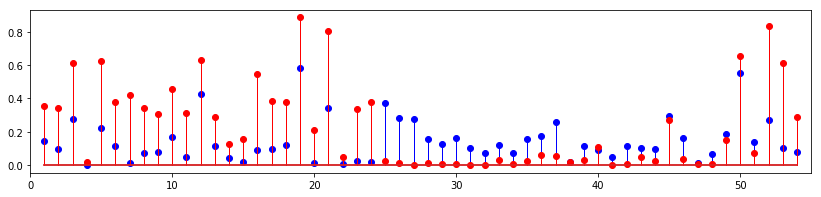

In [ ]:
hw2.problem_2_part_b()

In [20]:
import numpy as np
X_train, y_train, X_test, y_test = hw2.load_data(data_dir='./hw2/hw2-data')

In [39]:
# print(y_test)
class_0_indices, _ = np.where(y_test==0)
class_1_indices, _ = np.where(y_test==1)
print(class_0_indices, class_1_indices)

[37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86
 87 88 89 90 91 92] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36]


In [50]:
print(X_train.shape, y_train.shape, (y_train == 1).shape)
X_train[(y_train == 1).flatten(),:]

(4508, 57) (4508, 1) (4508, 1)


array([[   1,    1,    1, ...,    5,  101, 1028],
       [   1,    0,    1, ...,   10,  485, 2259],
       [   0,    0,    0, ...,    4,   40,  191],
       ..., 
       [   0,    0,    1, ...,    4,   62,  258],
       [   0,    0,    0, ...,    4,   66,  101],
       [   0,    1,    1, ...,    3,  318, 1003]])

In [57]:
np.sum(X_train[(y_train == 1).flatten(),:], axis=0)

array([   628,    607,   1089,     38,   1107,    668,    745,    611,
          547,    814,    557,   1118,    510,    227,    285,    968,
          681,    677,   1574,    373,   1432,     94,    594,    669,
           49,     26,      7,     30,     12,     17,      3,      2,
           61,     10,     45,    111,     99,     32,     59,    199,
            1,     20,     85,     46,    479,     68,     18,     16,
          269,   1160,    128,   1480,   1092,    509,  16924, 185553,
       837566])

In [98]:
x = np.arange(12).reshape((6,-1))
print(x)
np.sum(x, axis=1)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]


array([ 1,  5,  9, 13, 17, 21])